## Importo pandas e DBSCAN

In [268]:
import numpy as np
import pandas as ps
from sklearn.metrics import *
from sklearn.cluster import DBSCAN


## Importo il dataset e elimino attributi categorici

In [269]:
hr = ps.read_csv('HR_comma_sep.csv')

In [270]:
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)

In [271]:
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

Rinomino i valori di salary low medium e high in 0 , 1 , 2

In [272]:
hr_train.dtypes

satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
salary                    int64
dtype: object

# SATISFACTION LEVEL

## Tentativo numero 1 (satisfaction_level e last_evaluation)

In [273]:
from sklearn.preprocessing import StandardScaler

In [274]:
hr_train = hr_train.drop(['number_project', 'average_montly_hours', 'time_spend_company', 'salary'], axis=1)

In [275]:
X, y = hr_train.values, hr_train.columns

In [276]:
X = StandardScaler().fit_transform(X)

In [277]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=400).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)



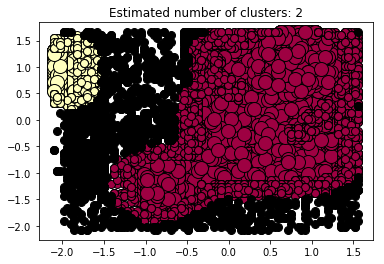

In [278]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con eps= 0,5 con min_samples = 400 -> 2 cluster + noise ridotto

                               600 -> 2 cluster + aumento noise ("ridotto")
                  
                               800 -> 2 cluster + aumento noise ("moderato")
                  
                               1000 -> 1 cluster + noise ("molto elevato")
        
con eps = 0,3 con min_samples = 400 -> 2 cluster + noise moderato

                               600 -> 2 cluster + noise ("estremamente elevato")
                  
                               800 -> 1 cluster + noise ("estremamente elevato")
                  
                               1000 -> 1 cluster + noise ("estremamente elevato")

## Tentativo 2 (satisfaction_level, number_project)

In [279]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [280]:
hr_train = hr_train.drop(['time_spend_company', 'last_evaluation', 'salary', 'average_montly_hours'], axis=1)

In [281]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [284]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

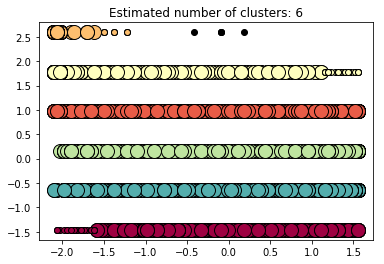

In [285]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 6 cluster + noise ("ridotto")

                  200 -> 6 cluster + noise ("moderato")
                  
                  300 -> 5 cluster + noise ("ridotto per 5 cluster")
                  
                  400 -> 5 cluster + noise ("moderato per 5 cluster")
                  
                  600 -> 5 cluster + noise ("elevato per 5 cluster")

## Tentativo 3 (satisfaction_level, average_monthly hours)

In [286]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [287]:
hr_train = hr_train.drop(['time_spend_company', 'last_evaluation', 'salary', 'number_project'], axis=1)

In [288]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [314]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

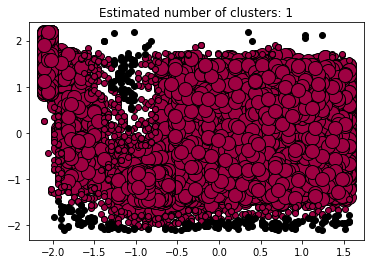

In [315]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con eps = 0.5 con min_samples = 300 -> 1 cluster + noise ("ridotto")
                  
                  500 -> 2 cluster + noise ("moderato")

                  1000 -> 1 cluster + noise ("moderato")
                  
con eps = 0.3 con min_samples = 100 -> 1 cluster + noise ridotto

                    300 -> 2 cluster + noise ("elevato")
                  
                  500 -> 2 cluster + noise ("molto elevato")

                  

## Tentativo 4 (satisfaction_level, time_spend_company)

In [319]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [320]:
hr_train = hr_train.drop(['average_montly_hours', 'last_evaluation', 'salary', 'number_project'], axis=1)

In [321]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [329]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

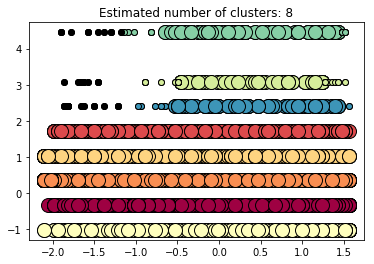

In [330]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples =   50 -> 8 cluster + noise ridotto

                    100 -> 6 cluster + noise moderato
                    
                    300 -> 7 cluster + noise elevato
                    

## Tentativo 5 (satisfaction_level, salary)

In [331]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [332]:
hr_train = hr_train.drop(['average_montly_hours', 'last_evaluation', 'time_spend_company', 'number_project'], axis=1)

In [333]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [336]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=300).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

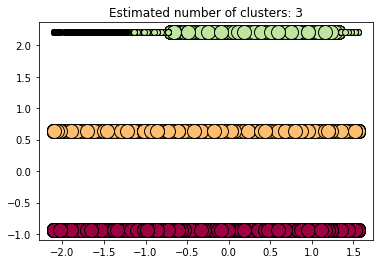

In [337]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples =   100 -> 3 cluster 
                    
                    300 -> 3 cluster + noise moderato

# LAST EVALUATION

## Tentativo 1 (last_evaluation, number_project)

In [338]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [339]:
hr_train = hr_train.drop(['time_spend_company', 'satisfaction_level', 'salary', 'average_montly_hours'], axis=1)

In [340]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [343]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

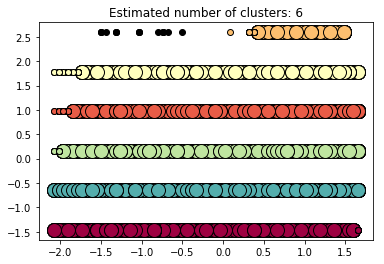

In [344]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 6 cluster + noise ("ridotto")

                  200 -> 6 cluster + noise ("moderato")
                  
                  300 -> 5 cluster + noise ("ridotto per 5 cluster")
                  
                  400 -> 5 cluster + noise ("moderato per 5 cluster")
                  
                  600 -> 5 cluster + noise ("elevato per 5 cluster")

## Tentativo 2 (last_evaluation, average_montly_hours)

In [345]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [346]:
hr_train = hr_train.drop(['time_spend_company', 'satisfaction_level', 'salary', 'number_project'], axis=1)

In [347]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [359]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=1000).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

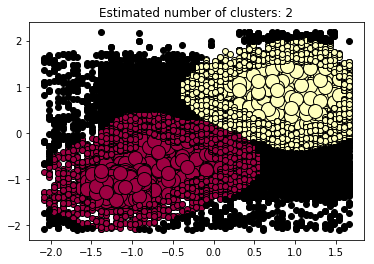

In [360]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con eps = 0.5 con min_samples = 500 -> 1 cluster + noise ridotto

                  1000 -> 2 cluster + noise elevato
                  
con eps = 0.3 con min_samples = 100 -> 1 cluster + noise ridotto

                    300 -> 1 cluster + noise ("elevato")
                  
                  500 -> 2 cluster + noise ("molto elevato")

## Tentativo 3 (last_evaluation, time_spend_company)

In [361]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [362]:
hr_train = hr_train.drop(['average_montly_hours', 'satisfaction_level', 'salary', 'number_project'], axis=1)

In [363]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [366]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

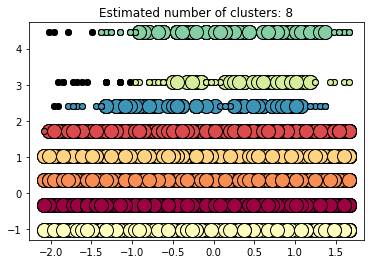

In [367]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 50 -> 8 cluster + noise ridotto

                    100 -> 5 cluster + noise ("moderato")


## Tentativo 4 (last_evaluation, salary)

In [369]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [370]:
hr_train = hr_train.drop(['average_montly_hours', 'satisfaction_level', 'time_spend_company', 'number_project'], axis=1)

In [371]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [374]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=300).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

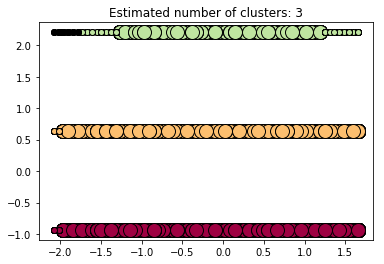

In [375]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 3 cluster

                  300 -> 3 cluster + noise minimo

# NUMBER PROJECT

## Tentativo numero 1 (number project, average monthly hours)

In [376]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [377]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'time_spend_company', 'salary'], axis=1)

In [378]:
X, y = hr_train.values, hr_train.columns

In [379]:
X = StandardScaler().fit_transform(X)

In [382]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=100).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


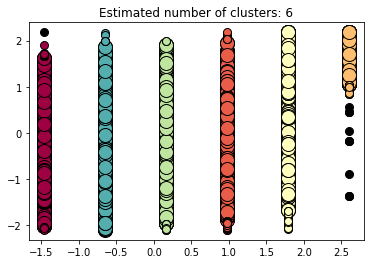

In [383]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=8)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 6 cluster

                  200 -> 5 cluster + noise ("ridotto")
                  
                  300 -> 5 cluster + noise ("elevato")
                  
                  600 -> 4 cluster + noise ("molto elevato")

## Tentativo numero 2 (number project, time_spend_company)

In [384]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [385]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'number_project', 'salary'], axis=1)

In [386]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [389]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

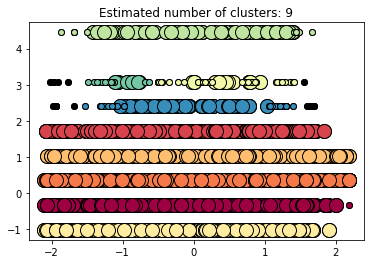

In [390]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples =   50 -> 9 cluster + noise minimo

                    100 -> 5 cluster + noise elevato

         

## Tentativo numero 3 (number project, salary)

In [391]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [392]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'number_project', 'time_spend_company'], axis=1)

In [393]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [396]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=300).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

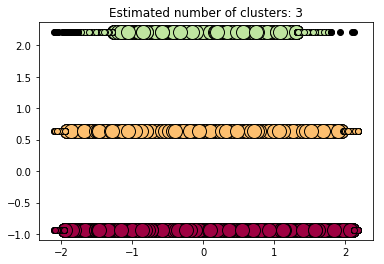

In [397]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 3 cluster

                  300 -> 3 cluster + noise minimo

# AVERAGE MONTHLY HOURS

## Tentativo numero 1 (average monthly hours, time_spend_company)

In [398]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [399]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'number_project', 'salary'], axis=1)

In [400]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [403]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=50).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

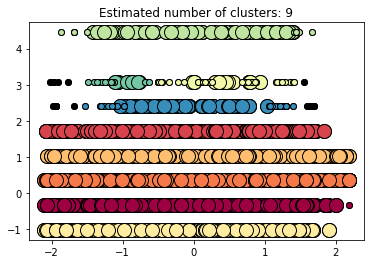

In [404]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples =   50 -> 9 cluster + noise minimo

                    100 -> 5 cluster + noise elevato


## Tentativo numero 2 (average monthly hours, salary)

In [405]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [406]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'number_project', 'time_spend_company'], axis=1)

In [407]:
X, y = hr_train.values, hr_train.columns
X = StandardScaler().fit_transform(X)

In [410]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=300).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

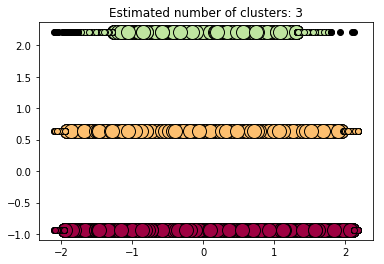

In [411]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 100 -> 3 cluster

                  300 -> 3 cluster + noise minimo

# TIME SPEND COMPANY

## Tentativo 1 (time_spend_company, salary)

In [412]:
hr = ps.read_csv('HR_comma_sep.csv')
hr_train = hr.drop(['sales', 'Work_accident', 'left', 'promotion_last_5years'], axis=1)
hr_train['salary'].replace(['low', 'medium', 'high'], [0, 1, 2], inplace = True)

In [413]:
hr_train = hr_train.drop(['last_evaluation', 'satisfaction_level', 'number_project', 'average_montly_hours'], axis=1)

In [414]:
X, y = hr_train.values, hr_train.columns

In [415]:
X = StandardScaler().fit_transform(X)

In [418]:
# Compute DBSCAN
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)


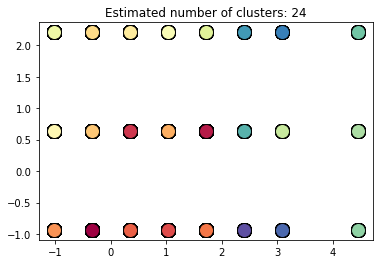

In [419]:
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

con min_samples = 10 -> 24 cluster

                  40 -> 21 cluster + noise
                  
                  60 -> 19 cluster + noise
                  
                  100 -> 14 cluster + noise
                  
                  400 -> 9 cluster + noise